# Sentiment Analysis on Amazon Product Reviews  
### Data Analytics Internship Project – CodeAlpha  
**Prepared by:** Zoya Naseer

## 1. Introduction

Sentiment Analysis is a Natural Language Processing (NLP) technique used to analyze opinions and emotions expressed in textual data.

In this project, Amazon product reviews are analyzed to classify customer sentiments as **Positive**, **Negative**, or **Neutral**.  
This analysis helps understand customer satisfaction, product perception, and overall public opinion.


## 2. Objective

- To analyze customer review text using NLP techniques  
- To classify reviews into Positive, Negative, and Neutral sentiments  
- To visualize sentiment distribution  
- To derive business insights for marketing and product improvement


In [2]:
!pip install textblob

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.7 MB/s  0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- --

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


In [2]:
df = pd.read_csv("Reviews.csv")  
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 3. Understanding the Dataset


In [3]:
df.shape


(568454, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## 4. Data Cleaning

To ensure accurate sentiment analysis, missing and invalid text values are removed.


In [6]:
df = df.dropna(subset=['Text'])


In [7]:
df['Text'] = df['Text'].astype(str)


df['Text'].dtype


dtype('O')

## 5. Sentiment Analysis Logic


In [8]:
# SENTIMENT CLASSIFICATION FUNCTION 


def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [9]:
# APPLY SENTIMENT ANALYSIS


df['Sentiment'] = df['Text'].apply(get_sentiment)
df[['Text', 'Sentiment']].head()


,Text,Sentiment
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Positive
3,If you are looking for the secret ingredient i...,Positive
4,Great taffy at a great price. There was a wid...,Positive


## 6. Sentiment Distribution


In [10]:
# SENTIMENT COUNT

df['Sentiment'].value_counts()



Sentiment
Positive    502016
Negative     58051
Neutral       8387
Name: count, dtype: int64

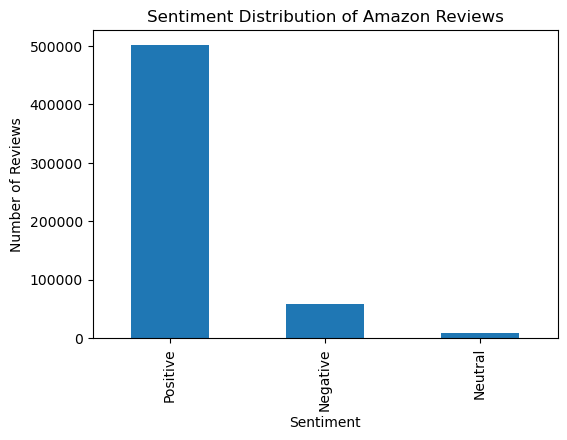

In [11]:
# SENTIMENT BAR CHART

plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


## 7. Polarity Score Analysis


In [12]:
# POLARITY COLUMN

df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['Polarity']].head()


,Polarity
0,0.450000
1,-0.033333
2,0.133571
3,0.166667
4,0.483333


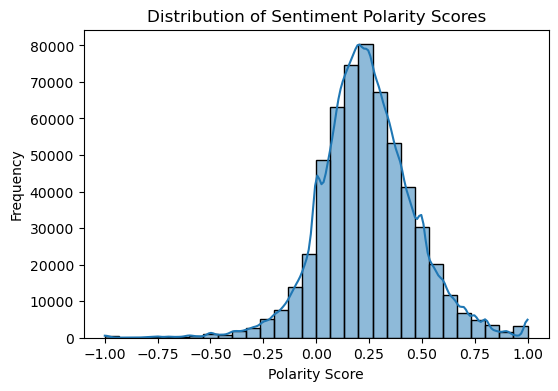

In [13]:
# POLARITY DISTRIBUTION PLOT

plt.figure(figsize=(6,4))
sns.histplot(df['Polarity'], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


## 8. Rating vs Sentiment Analysis


In [14]:
# COMPARISON TABLE

pd.crosstab(df['Score'], df['Sentiment'])


Sentiment,Negative,Neutral,Positive
Score,,,
1,22357,2155,27756
2,8102,619,21048
3,5949,654,36037
4,5217,884,74554
5,16426,4075,342621


## 9. Key Insights

- Majority of reviews are **positive**, indicating high customer satisfaction.
- Negative reviews highlight product quality or expectation gaps.
- Neutral reviews are mostly informational.
- Polarity scores show strong emotional feedback patterns.


## 10. Business Impact

- **Marketing:** Promote products with strong positive sentiment.
- **Product Improvement:** Address common issues in negative reviews.
- **Customer Support:** Identify dissatisfaction early.
- **Brand Monitoring:** Track sentiment trends over time.
